# Netflix EDA
Performing exploratory data analysis to understand the data

### Tasks
- Understand the dataset, data types and missing values
- Clean the dataset and handle missing values
- Perform data visualisation
- Create final summary report

In [52]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # For colormap
from collections import Counter
import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation

In [4]:
# reading data from the netflix csv file
df = pd.read_csv('C:/Users/David/Documents/Datasets/netflix_titles.csv')
df.head(10)
#df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
# the shape function shows the number of rows and columns in a dataset
df.shape 

(8807, 12)

In [6]:
# getting a statistical summary of numerical columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# count the number of missing values from each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# checking the number of movies and tv shows in the dataset
movie_tvShows = df['type'].value_counts()
movie_tvShows

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

## Handling missing values and correcting data types
All other data types are correct except for the release year which is object instead of date time.
From the previous test, the following features were found to have null values:

- director
- cast
- country
- date_added
- rating
- duration

Object data types with missing values will be replaced with "Unavailable" and the date_added feature will be changed to datetime as it is currently an object type.

In [11]:
# Converting the data type from object to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')
#checking the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None


### Handling missing values of object features


In [13]:
df.fillna({'rating':'Unavailable','cast':'Únavailable','country':'Unavailable','director':'Unavailable'}, inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

- To handle the null values in the date added column, there a 3 options that can be used. The first option is to research online for the release date of the movies and enter them manually. Another option is to drop the rows since they are only few and they wont have a significant effect on the dataset. The third option is to replace the null values with the most recent date from the date_added column and I will use the third option to handle the null values.

In [15]:
# show rows from the date_added column with nulls
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [16]:
most_recent = df['date_added'].max()
#filling the nulls with the most recent date
df.fillna({'date_added':most_recent}, inplace = True)

- Checking if the must recent date was added to the null values. We will use one of the ids from the rows that had missing values

In [18]:
df[df.show_id == 's8183'] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,2021-09-25,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


### Handling missing values from the duration column

In [20]:
# show rows with missing values from the duration column
df[df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### NB
- The above result shows that the values for duraion were mistakenly entered into the rating column. The misplaced values will be corrected 
and enter them in their proper column.
- In the below code we will check if those 3 rows are the only ones by director Louis C.K. to avoid overwritting because the duration values will be replaced with rating values where director is 'Louis C.K.'

In [22]:
df[df.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [23]:
# overwriting the duration values
df.loc[df['director'] == 'Louis C.K.', 'duration'] = df['rating']
df[df.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [24]:
df.loc[df['director'] == 'Louis C.K.', 'rating'] = 'Unavailable'
df[df.director == 'Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


## Analysis through visualisations

- In this section I will perform uni-variate and bi-variate.
- Uni-variate analysis means analysing a data based on 1 feature or column of a dataset.
- Bi-variate analysis means analysing data from 2 features or columns of a dataset

Text(0.5, 1.0, 'Distribution of Movies vs Tv Shows')

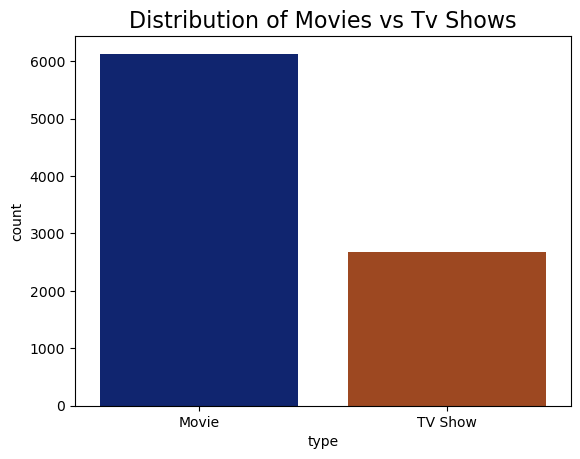

In [27]:
# Univariate analysis of the categorical data of the 'type' column
sns.countplot(x = df['type'], hue = df['type'], palette='dark' )
plt.title('Distribution of Movies vs Tv Shows', fontsize=16)

The result shows that there are more Movies than Tv Shows on Netflix

### Analysing to see which country has more content on netflix

Exploring which countries produce the most Netfilx content.

In [31]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

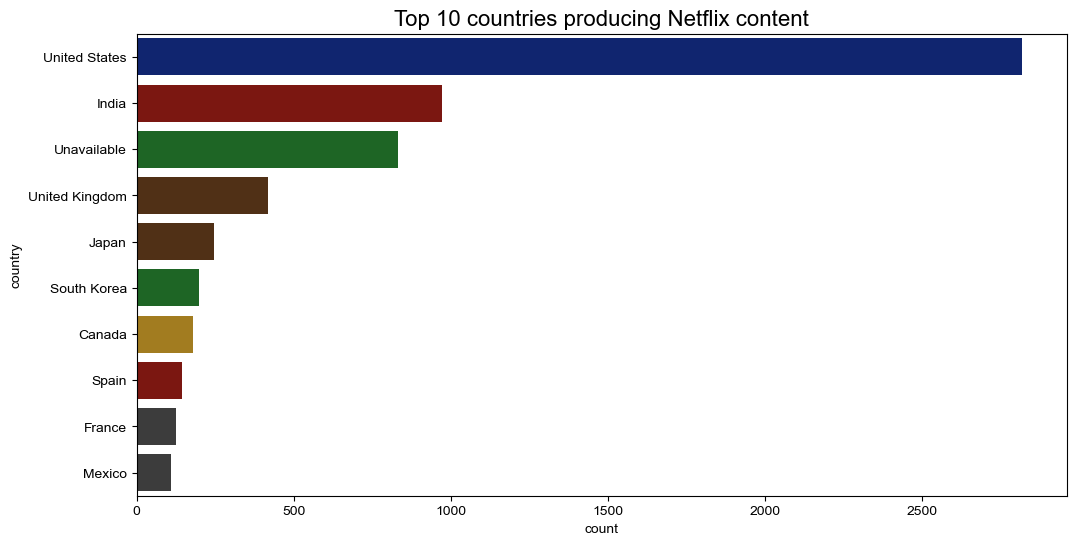

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(y = df['country'], order = df['country'].value_counts().index[0:10], palette = 'dark', hue = df['country'] )
plt.title('Top 10 countries producing Netflix content', fontsize=16)
sns.set_style("darkgrid")

Let's see what percentage of Netfilx content is produced by United States

In [45]:
valid_countries = df[df['country'] != 'Unavailable']
valid_count = valid_countries['country'].count()
usa_count = valid_countries['country'].value_counts().get('United States', 0)
usa_percentage = (usa_count/valid_count) * 100
usa_percentage

35.33099297893681

### Content Added overtime

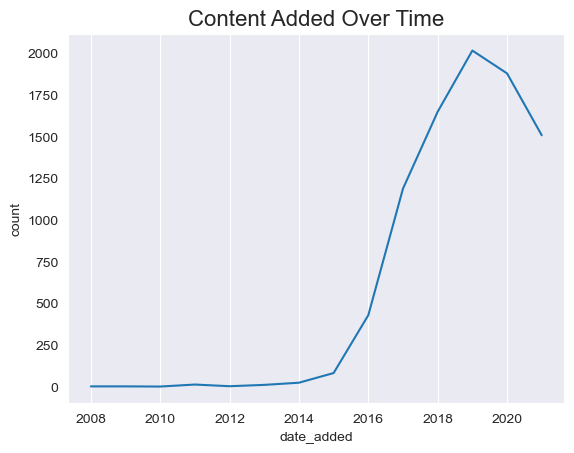

In [34]:
# Analysing the trend of content added to netflix over time
content_added_by_year = df['date_added'].dt.year.value_counts().sort_index()
content_added_by_year.plot(kind = 'line')
plt.title('Content Added Over Time', fontsize='16')
plt.ylabel('count')
plt.grid(axis='y')

We can observe that most content on Netfilx was added in 2019 

### Content by Rating

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-PG'),
  Text(3, 0, 'R'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'NR'),
  Text(10, 0, 'G'),
  Text(11, 0, 'Unavailable'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'NC-17'),
  Text(14, 0, 'UR')])

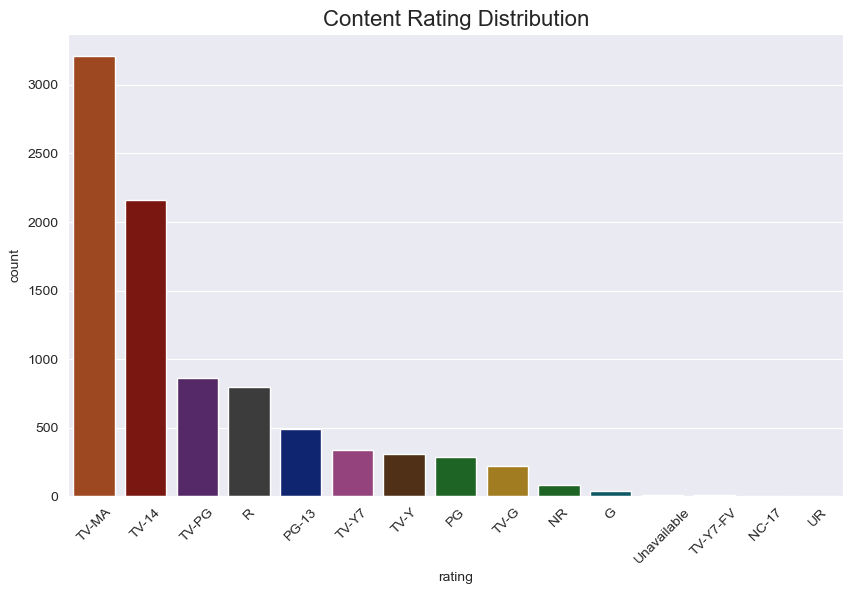

In [37]:
# Set the size of the plot
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
# Create the countplot
sns.countplot(x=df['rating'],order=df['rating'].value_counts().index, hue= df['rating'], palette = 'dark')
plt.title('Content Rating Distribution',fontsize  = 16)
# Rotate the x labels for better readability
plt.xticks(rotation=45)

### Genre Exploration

C:\Users\David\AppData\Local\Temp\ipykernel_6480\847295960.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('plasma',10)


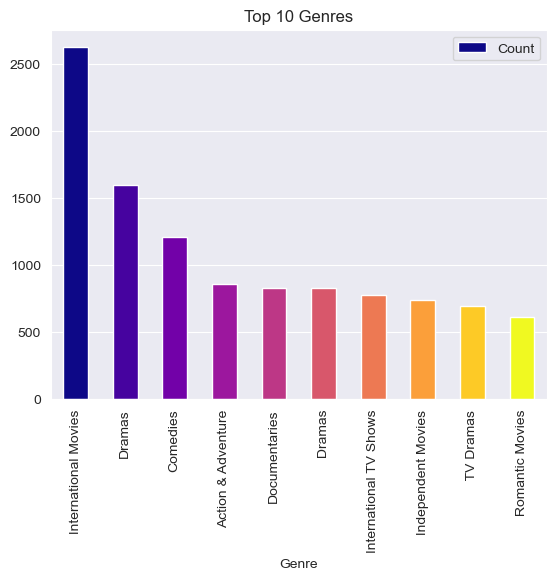

In [39]:
genres = df['listed_in'].str.split(',').explode()
#the counter method is imported from the collections library
genre_counts = Counter(genres)
#setting a color map with an equal numbers of bars
colors = cm.get_cmap('plasma',10)
# creating a dataframe of genres
genre_df = pd.DataFrame(genre_counts.items(),columns=['Genre','Count']).sort_values(by='Count', ascending=False)
genre_df.head(10).plot(kind='bar',color= [colors(i) for i in range(10)],x='Genre',y='Count',title='Top 10 Genres')
# Add grid lines
plt.grid(axis='x')

### Summary 
After analysing the Netfilx dataset, concluded that:
- There are more Movies than Tv Shows on Netfilx.
- Of the content from available countries, majority is from United states accounting for 35%.
- In the year 2019 is when more content was added on Netflix compared to other years.
- International Movies and Dramas stand out as the most common genres reflecting on the platforms focus on delivering content that suits global auduences.
- Majority of the content is rated Tv-MA followed closely by Tv-14 which shows that Netfilx caters for adult audience mostly.